<a href="https://colab.research.google.com/github/edujongkook/colab_sbs_python_weekend/blob/main/python_%EA%B8%B0%EC%B4%88_6%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6일차 강의 내용
- 주요내용 복습
- 데이터 베이스

## 복습 내용
- cctv.csv 파일을 이용해서 함수 만들기
- goyang_food.csv 파일을 이용해서 함수 만들기
- 클래스를 이용해서 객체로 만들어보기


## 1. 함수만들기

### `load_csv_file(file_name)`



> 함수 이름 : load_csv_file  
인자 : 파일 이름 file_name  
반환값 : csv 리스트 csv_list  
하는일 : 인자로 파일이름 file_name을 받아 해당 csv 파일을 읽어 중첩 리스트 파일을 리턴하는 함수



In [54]:
import csv


def load_csv_file(file_name):
    csv_list = []  # 빈 리스트 생성
    with open(file_name + '.csv') as f:  # 모드 없이 사용시 기본적으로 read text 모드 'rt'
        reader = csv.reader(f)
        for line in reader:  # 한번에 한줄씩 콤마로 나누어진 값들을 요소로 하는 리스트 배출
            csv_list.append(line)  # 해당 리스트를 csv_list의 요소로 추가
    return csv_list  # 리스트속에 리스트가 요소로 추가된 중첩 리스트 리턴 [ [], [], ... ]


In [43]:
csv_list = load_csv_file('cctv')

In [ ]:
print(csv_list[0],'\n', csv_list[1])

### `find_cctv(csv_list)`

> 함수 이름 : find_cctv  
인자 : csv 문서에서 추출한 리스트 csv_list  
반환값 : 찾아낸 cctv 리스트 find_cctv_list  
하는일 : 사용자로 부터 주소를 입력받고 (ex:'와우산로') 찾아낸 cctv 정보 리스트를 반환하는 함수

In [ ]:
csv_list[1][1].find('일산로')

In [37]:
def find_cctv(csv_list):
    address = input('주소를 입력해 주세요(ex: 와우산로) >>> ')
    cctv_find_list = [[csv_list[0][1], csv_list[0][3], csv_list[0][-3], csv_list[0][-2]]]
    for info_line in csv_list[1:]:
        if info_line[1].find(address) != -1:
            cctv_find_list.append([info_line[1], info_line[3], info_line[-3], info_line[-2]])
    return cctv_find_list

In [ ]:
find_cctv(csv_list)

In [45]:
food_csv_list = load_csv_file('goyang_food')

In [ ]:
food_csv_list[1]

### `find_food(csv_list)`



> 함수 이름 : find_food
인자 : 음식점 csv 리스트 food_csv_list  
반환값 : 찾아낸 음식점 리스트 find_food_list  
하는일 : 음식점 리스트를 받아 주소를 입력받고 (ex:'일산로') 찾아낸 음식점 리스트를 반환하는 함수



## 2. 객체로 만들기

### `CctvFinder`

In [81]:
import csv


class CctvFinder:


    def __init__(self, file_name):
        self.csv_list = []
        with open(file_name + '.csv') as f:
            reader = csv.reader(f)
            for line in reader:
                self.csv_list.append(line)

    def find_cctv(self):
        address = input('주소를 입력해 주세요(ex: 와우산로) >>> ')
        cctv_find_list = [[csv_list[0][1], csv_list[0][3], csv_list[0][-3], csv_list[0][-2]]]
        for info_line in csv_list[1:]:
            if info_line[1].find(address) != -1:
                cctv_find_list.append([info_line[1], info_line[3], info_line[-3], info_line[-2]])
        return cctv_find_list

In [82]:
cf = CctvFinder('cctv')

In [ ]:
cf.find_cctv()

### `FoodFinder`

### 슈퍼 클래스 `Finder`

In [87]:
class Finder:

    def __init__(self, file_name):
        self.csv_list = []
        with open(file_name + '.csv') as f:
            reader = csv.reader(f)
            for line in reader:
                self.csv_list.append(line)


In [88]:
import csv


class CctvFinder(Finder):


    def __init__(self, file_name):
        super().__init__(file_name)

    def find_cctv(self):
        address = input('주소를 입력해 주세요(ex: 와우산로) >>> ')
        cctv_find_list = [[csv_list[0][1], csv_list[0][3], csv_list[0][-3], csv_list[0][-2]]]
        for info_line in csv_list[1:]:
            if info_line[1].find(address) != -1:
                cctv_find_list.append([info_line[1], info_line[3], info_line[-3], info_line[-2]])
        return cctv_find_list

In [89]:
cf = CctvFinder('cctv')

In [ ]:
cf.find_cctv()

## 데이터 베이스

### SQL (Structured Query Language) 과 NoSQL(Not Only Structured Query Language)

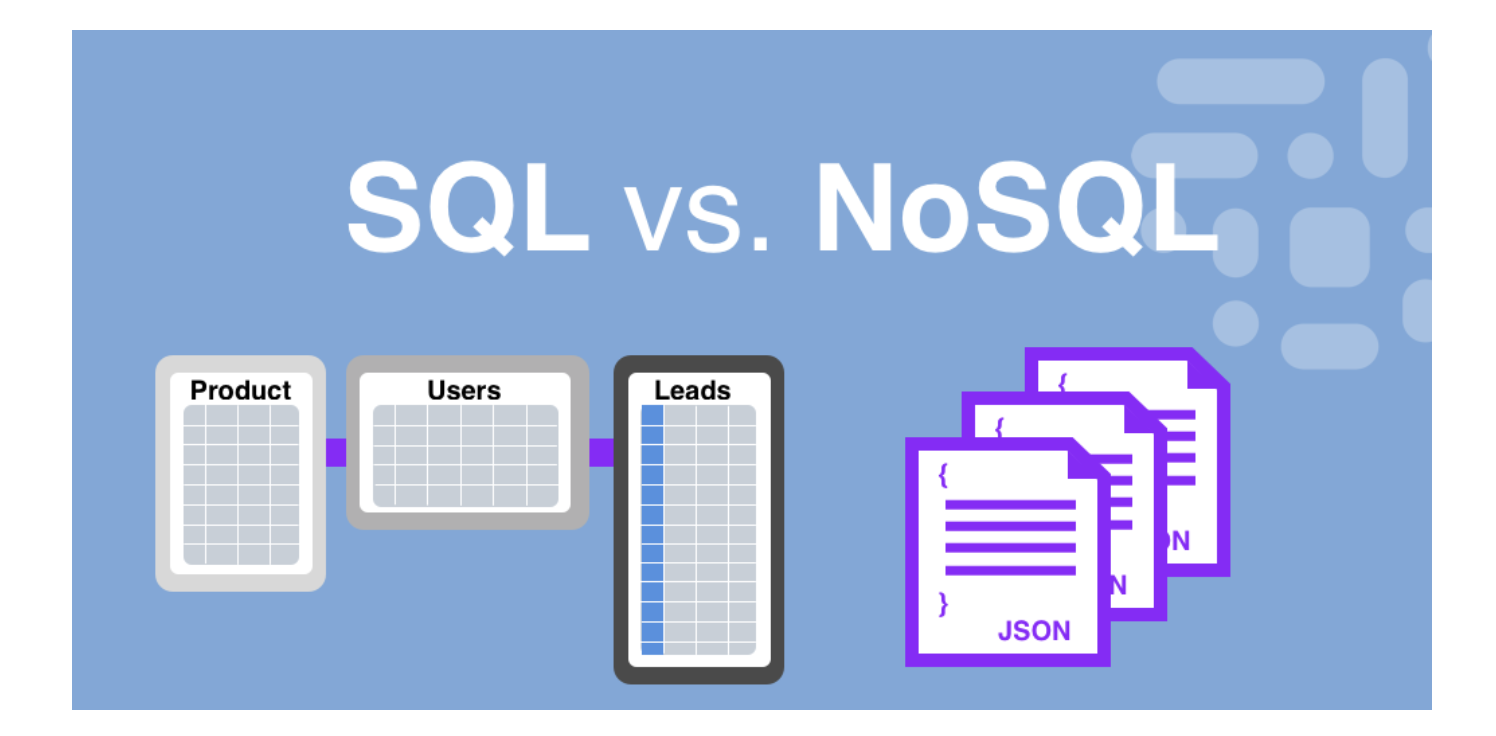

SQL

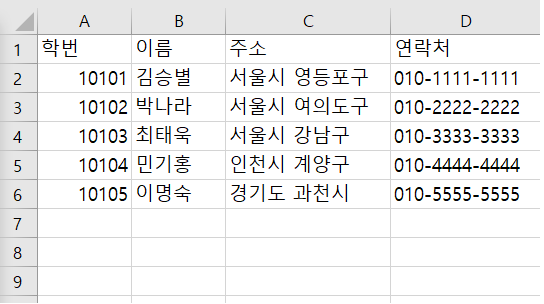

NoSQL

In [ ]:
# JSON 파일
{
    'name': 'james',
    'age': 20,
    'spec': [
        175.5,
        70.5
    ]
}

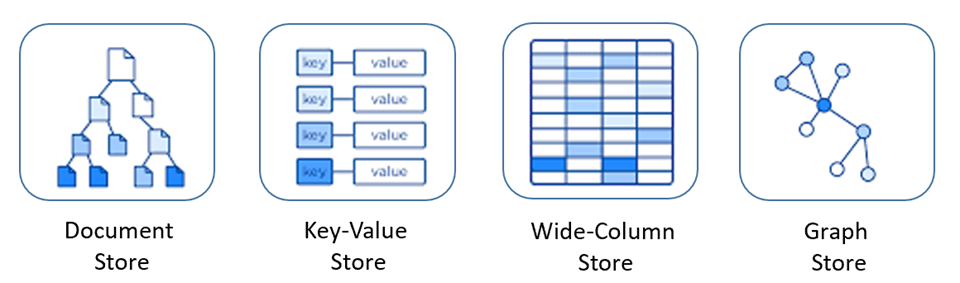

DB Ranking(2020)

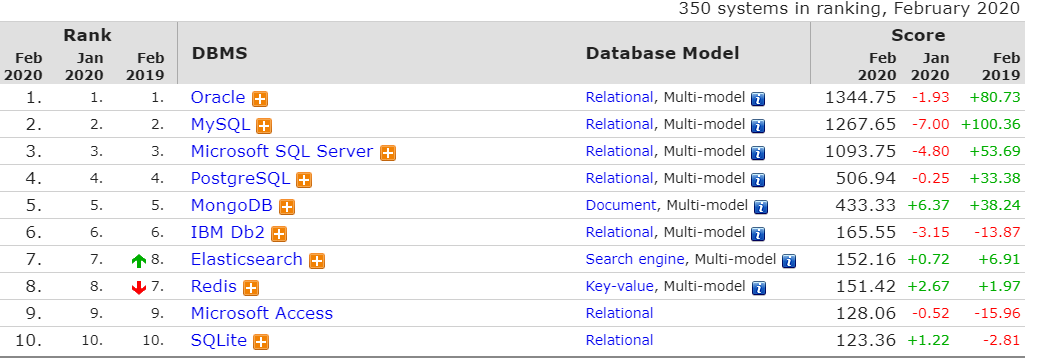

### Sqlite3 모듈 사용해보기

web sqlite 뷰어

https://sqliteviewer.app/

DB 파일, cursor 만들기

In [61]:
import sqlite3

In [62]:
conn = sqlite3.connect("goyang_food.db", isolation_level=None)  # isolation_level 옵션은 commit 없이 db에 바로 적용

In [63]:
c = conn.cursor()

TABLE 만들기

In [69]:
c.execute("CREATE TABLE IF NOT EXISTS name_address_table \
    (id integer PRIMARY KEY AUTOINCREMENT NOT NULL, name text, address text)")

INSERT 문 (데이터 베이스에 데이터 입력)

In [ ]:
c.execute("INSERT INTO name_address_table (name, address) \
    VALUES(?,?)", ('test가게', 'test주소'))

SELECT 문 (데이터 베이스의 자료 조회하기)

In [71]:
c.execute("SELECT * FROM name_address_table")
print(c.fetchone())

(1, 'test가게', 'test주소')


데이터 베이스에 입력할 자료를 튜플로 준비하기

In [ ]:
food_list = load_csv('goyang_food')

In [ ]:
food_list[0]

['영업상태명', '소재지전화', '소재지전체주소', '사업장명', '위생업태명']

In [ ]:
tuple(food_list[1])

('영업/정상', '', '경기도 고양시 일산동구 대산로11번길 32-9, 지하1층 일부호 (정발산동)', '69', '한식')

In [ ]:
insert_list = []
cut_food_list = food_list[1:1000]
for list_line in cut_food_list:
    insert_list.append((list_line[3], list_line[2]))


In [ ]:
insert_list

executemany 로 리스트 형태의 튜플들을 동시에 입력

In [73]:
c.executemany("INSERT INTO name_address_table (name, address) \
    VALUES(?,?)", insert_list)

SELECT 문과 for 문

In [ ]:
c.execute("SELECT * FROM name_address_table")
for row in c.fetchall():
    print(row)

ORDER BY ASC (오름차순 정렬 / 내림차순은 DESC)

In [ ]:
c.execute("SELECT * FROM name_address_table ORDER BY name ASC")
for row in c.fetchall():
    print(row)

In [76]:
inserted_name = [line[0] for line in insert_list]

In [77]:
for name in inserted_name:
    if '처갓집' in name:
        print(name)

처갓집양념치킨 주엽점
처갓집양념치킨(향동점)


SELECT WHERE LIKE 문 (조건 조회문)

In [80]:
c.execute("SELECT * FROM name_address_table WHERE name LIKE '%처갓집%'")
for row in c.fetchall():
    print(row)

DELETE WHERE LIKE문 (조건 삭제문)

In [ ]:
c.execute("DELETE FROM name_address_table WHERE name LIKE '%처갓집%'")